# KERAS 분류 DNN모델 구성
- 모델 설계 & 생성 & 학습
- 분류 모델용 손실함수, 성능지표

In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
import pandas as pd

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
# 로드된 데이터셋 확인
print('train_set : ', x_train.shape, y_train.shape)
print('test_set : ',x_test.shape,y_test.shape )

train_set :  (60000, 28, 28) (60000,)
test_set :  (10000, 28, 28) (10000,)


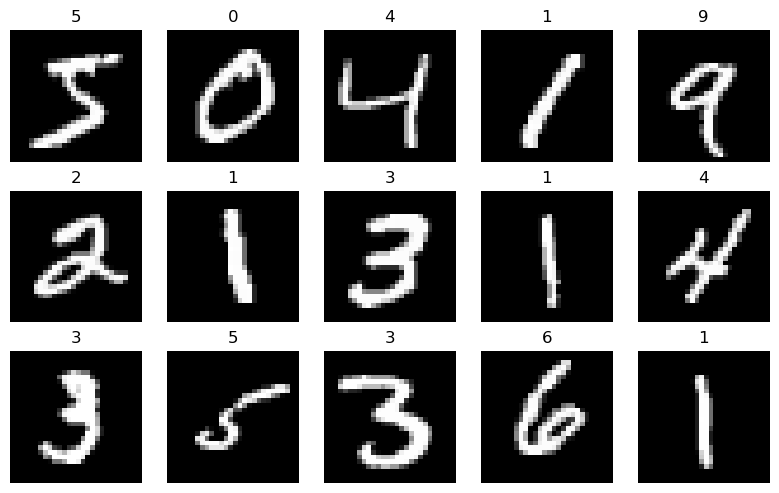

In [5]:
# 데이터 시각화
import matplotlib.pyplot as plt

#canvas 생성
fig,axes = plt.subplots(3,5)
fig.set_size_inches(8,5)

for i in range(15):
    ax=axes[i//5,i%5]
    #imshow로 이미지 시각화
    ax.imshow(x_train[i],cmap='gray')
    ax.axis('off')
    ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

# 데이터 전처리

In [6]:
# x_train 배열의 데이터 확인
x_train[0,10:15,10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [7]:
# 픽셀 값의 최소/최댓값
print(f'정규화 전] 최소값: {x_train.min()}, 최댓값:{x_train.max()}')

# 데이터 정규화
x_train = x_train/x_train.max()

#정규화 후 최소/최대값 확인
print(f'정규화 후] 최소값: {x_train.min()}, 최댓값: {x_train.max()}')

정규화 전] 최소값: 0, 최댓값:255
정규화 후] 최소값: 0.0, 최댓값: 1.0


In [8]:
# test셋에서도 정규화 동일 적용
x_test = x_test / x_test.max()

In [9]:
# 정규화 변환 완료 후 데이터 출력 확인
# 변환 후 x_train 배열의 데이터 확인
x_train[0,10:15,10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

# Flatten 레이어

In [10]:
print(f'변경 전 shape: {x_train.shape}')
print(f'1D으로 shape변경 후 : {x_train.reshape(60000,-1).shape}')

변경 전 shape: (60000, 28, 28)
1D으로 shape변경 후 : (60000, 784)


In [11]:
print(f'변경 전 shape:{x_train.shape}')

#Flatten 레이어 적용 후 shape 출력
#print(f'Flatten 적용 후 : {tf.keras.layers.Flatten()(x_train).shape}')

변경 전 shape:(60000, 28, 28)


# 활성화 함수

In [12]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128,activation='relu')

<Dense name=dense, built=False>

In [13]:
# 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu')
])

# 모델 요약을 출력하여 제대로 정의되었는지 확인
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# 입력과 출력

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax'),
])

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
#출력층 노드 = 1개인 경우, sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')

#출력층 노드 = 2개 이상인 경우, softmax
tf.keras.layers.Dense(10,activation='softmax')

<Dense name=dense_7, built=False>

# 손실함수

In [16]:
# 이진 분류(출력 노드 개수=1, sigmoid인 경우)
model.compile(loss='binary_crossentropy')

In [17]:
# y가 원핫 벡터인 경우
model.compile(loss='categorical_crossentropy')

#y가 원핫 벡터가 아닌 경우
model.compile(loss='sparse_categorical_crossentropy')

# 옵티마이저

In [18]:
# 클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer='adam')

#문자열로 지정
model.compile(optimizer='adam')

# 평가지표

In [19]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[acc])

In [20]:
# 문자열로 지정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 훈련

In [21]:
#훈련
model.fit(x_train,y_train,
          #검증 셋 지정
          validation_data=(x_test,y_test),
          epochs=10,
          )

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8751 - loss: 0.4143 - val_accuracy: 0.9651 - val_loss: 0.1126
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9706 - loss: 0.0970 - val_accuracy: 0.9745 - val_loss: 0.0798
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9791 - loss: 0.0642 - val_accuracy: 0.9753 - val_loss: 0.0816
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9854 - loss: 0.0465 - val_accuracy: 0.9731 - val_loss: 0.0934
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9883 - loss: 0.0378 - val_accuracy: 0.9757 - val_loss: 0.0767
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9913 - loss: 0.0278 - val_accuracy: 0.9792 - val_loss: 0.0740
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9914 - loss: 0.0257 - val_accuracy: 0.9763 - val_loss: 0.0839
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9926 - loss: 0.0229 - 

# 평가

In [22]:
test_loss, test_acc=model.evaluate(x_test,y_test)

print('검증 셋 정확도:',test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - accuracy: 0.9762 - loss: 0.1053
검증 셋 정확도: 0.9794999957084656


# 예측

In [23]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step


In [24]:
#예측결과출력
predictions[0]

array([3.0337542e-11, 6.2182197e-09, 8.7002734e-09, 5.8596584e-08,
       2.2612874e-10, 3.1532366e-09, 1.0117254e-13, 9.9999845e-01,
       5.1888105e-10, 1.4986820e-06], dtype=float32)

In [25]:
import numpy as np

#0번 인덱스에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

#첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10],axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


In [26]:
#  데이터 시각화
import matplotlib.pyplot as plt
def get_one_result(idx):
    img,y_true,y_pred,confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]),100*np.max(predictions[idx])

    return img, y_true, y_pred, confidence

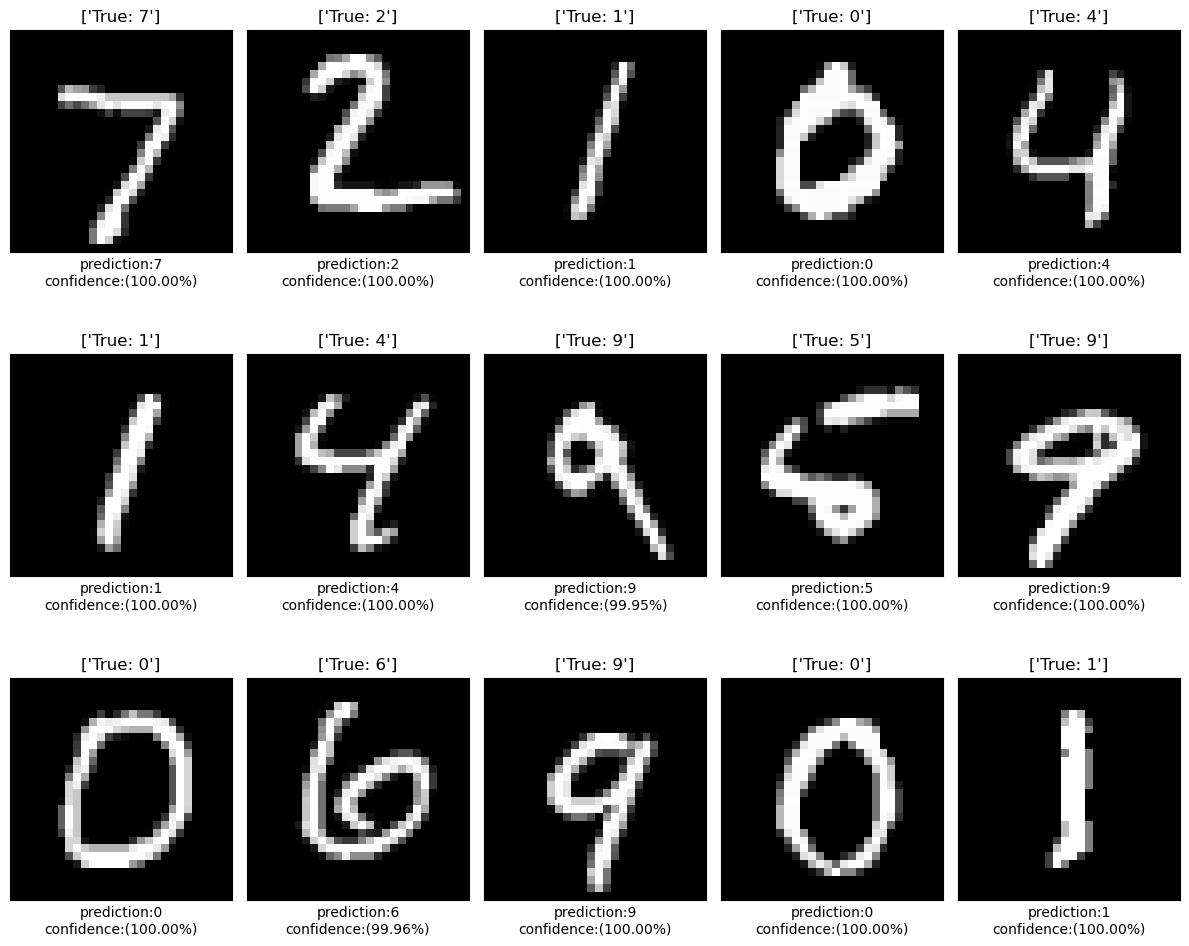

In [28]:
#canvas
fig,axes = plt.subplots(3,5)
fig.set_size_inches(12,10)
for i in range(15):
    ax=axes[i//5,i%5]
    img,y_true,y_pred,confidence=get_one_result(i)
    #imshow로 이미지 시각화

    ax.imshow(img,cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title([f'True: {y_true}'])
    ax.set_xlabel(f'prediction:{y_pred}\nconfidence:({confidence:.2f}%)')
plt.tight_layout()
plt.show()
